In [1]:
import warnings
from pathlib import Path

import mmcv
import numpy as np
import torch
import mmdet
from mmcv.ops import RoIPool
from mmcv.parallel import collate, scatter
from mmcv.runner import load_checkpoint

from mmdet.core import get_classes
from mmdet.datasets import replace_ImageToTensor
from mmdet.datasets.pipelines import Compose
from mmdet.models import build_detector
import collections
from PIL import Image
import PIL 
import os, numpy as np, cv2
from pathlib import Path
import csv
import json
import matplotlib.pyplot as plt
from mmcv.utils import build_from_cfg
from mmdet.datasets.builder import PIPELINES
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
from mmdet.datasets.pipelines import LoadImageFromFile
import os.path as osp
import mmcv
from pathlib import Path

In [2]:

config = mmcv.Config.fromfile(Path(r"C:\\Users\\nathan.sikora\Desktop\Stagenathan\\mmdetection_deep\\configs\\my_custom\\my_custom_config_1.py"))
model = init_detector(config, r"D:\NathanSikora\fusion\epoch_340.pth")
results = {'img_prefix': 'D:/NathanSikora/Images_profondeur/test','jet_prefix': 'D:/NathanSikora/Images_profondeur/test', 'img_info': {'filename': 'D:/NathanSikora/Images_profondeur/test/TE_D_18068_H3950_A60_2_589500.png'}}
transform = LoadImageFromFile()
instance_ = transform(results)
cfg = model.cfg
device = next(model.parameters()).device  # model device
cfg = cfg.copy()
    # set loading pipeline type
cfg.data.test.pipeline[0].type = 'LoadImageFromFile'

cfg.data.test.pipeline = replace_ImageToTensor(cfg.data.test.pipeline)
test_pipeline = Compose(cfg.data.test.pipeline)
data = test_pipeline(instance_)
newdata = dict()
for key in data:
    newdata[key] = [d.data for d in data[key]]

data = newdata

data['img_metas'] = [data['img_metas']]
img = data['img'][0]
jet = data['jet'][0]
img = img.expand(1,3, 1120, 800)
jet = jet.expand(1,3, 1120, 800)
data['img'][0] = img
data['jet'][0] = jet

if next(model.parameters()).is_cuda:
        # scatter to specified GPU
    data = scatter(data, [device])[0]
else:
    for m in model.modules():assert not isinstance(m, RoIPool), 'CPU inference with RoIPool is not supported currently.'

    # forward the model
with torch.no_grad():
    results = model(return_loss=False, rescale=True, **data)




AttributeError: 'ConfigDict' object has no attribute 'backbone'

In [22]:
def troisD(chemin):  
    #recuperation de l'image sous forme de tableau
    imgs=[]
    imgs = np.array(Image.open(Path(chemin)))
    
    #passage de 4D a 3D
    l, h = np.shape(imgs)
    img = []
    img = np.ones((l,h,3))
    l, h, z = np.shape(img)
    for i in range(0,3):
        img[:, :,i] = img[:, :,i]*imgs
    return img
chemin = r"D:/NathanSikora/Images_profondeur/test/TE_D_18068_H3950_A60_2_589500.png"
 #list_im = os.listdir(chemin)
img = troisD(chemin)


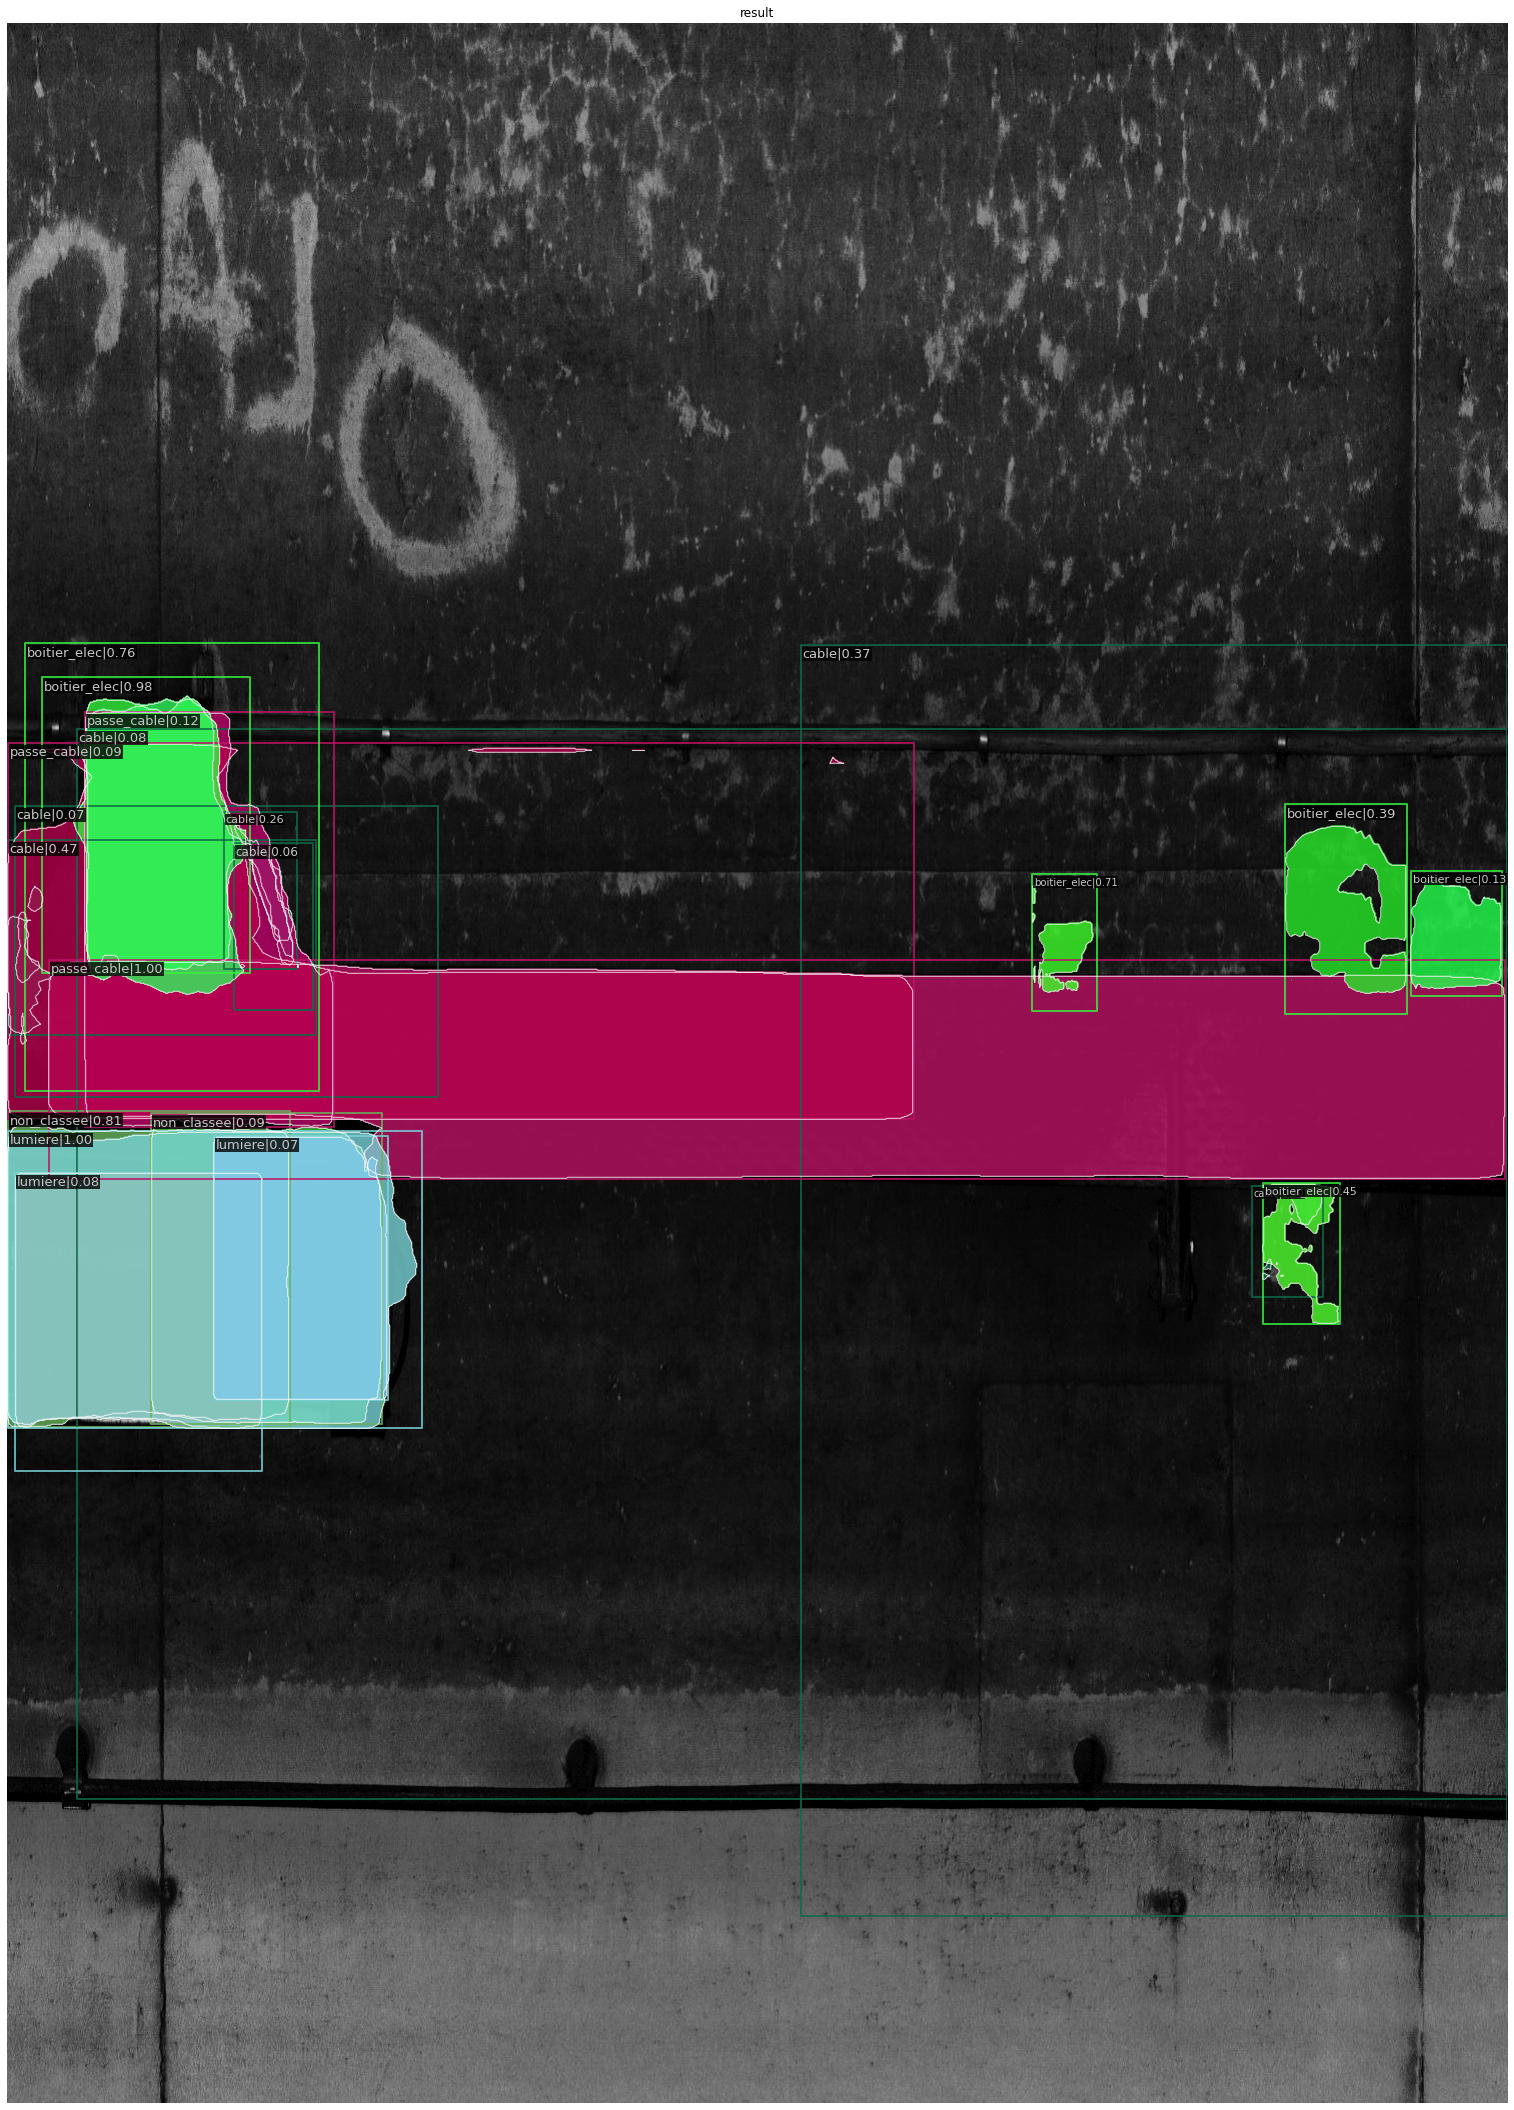

In [26]:
mmdet.apis.show_result_pyplot(model, img,results[0],score_thr=0.01)

In [15]:
img = data['img'][0]
jet = data['jet'][0]
img = img.expand(1,3, 1120, 800)
jet = jet.expand(1,3, 1120, 800)
data['img'][0] = img
data['jet'][0] = jet


NameError: name 'data' is not defined

In [24]:
config = mmcv.Config.fromfile(Path(r"C:\\Users\\nathan.sikora\Desktop\Stagenathan\\mmdetection_deep\\configs\\mask_rcnn_fusion.py"))
cfg = config.data.train

from mmdet.datasets.dataset_wrappers import (ClassBalancedDataset, ConcatDataset,MultiImageMixDataset, RepeatDataset)
for i in cfg['dataset'] : 
    print(i)
def build_dataset(cfg, default_args=None):
    for i in cfg :
        print(cfg)
    if isinstance(cfg, (list, tuple)):
        print(3)
        dataset = ConcatDataset([build_dataset(c, default_args) for c in cfg])
    elif cfg['type'] == 'RepeatDataset':
        print(1)
        dataset = RepeatDataset(cfg['dataset'], cfg['times'])
    return dataset
datasets = [build_dataset(cfg)]
print(datasets)


img_prefix
jet_prefix
classes
ann_file
{'type': 'RepeatDataset', 'times': 2, 'dataset': {'img_prefix': 'C:/Users/nathan.sikora/Desktop/Stagenathan/mmdetection_deep/configs/my_custom/grap/train/', 'jet_prefix': 'C:/Users/nathan.sikora/Desktop/Stagenathan/mmdetection_deep/configs/my_custom/grap/train/DEP', 'classes': ('non_classee', 'cable', 'passe_cable', 'lumiere', 'joint', 'camera', 'prisme_sos_telephone', 'bouche_incendie', 'reflecteur', 'prisme_issue_en_face', 'indication_issue_de_secours', 'plaque_numerotee', 'issue_de_secours', 'plaque_anneau', 'indication_id_sos', 'issue_sos_telephone', 'panneau_signalisation', 'coffrage', 'boitier_elec', 'non_definie_1', 'non_definie_2', 'non_definie_3', 'non_definie_4', 'non_definie_5'), 'ann_file': 'C:/Users/nathan.sikora/Desktop/Stagenathan/mmdetection_deep/configs/my_custom/grap/train/annotation_lcms_train.json'}}
{'type': 'RepeatDataset', 'times': 2, 'dataset': {'img_prefix': 'C:/Users/nathan.sikora/Desktop/Stagenathan/mmdetection_deep/conf

AttributeError: 'ConfigDict' object has no attribute 'CLASSES'

In [37]:
config = mmcv.Config.fromfile(Path(r"C:\\Users\\nathan.sikora\Desktop\Stagenathan\\mmdetection_deep\\configs\\my_custom\\my_custom_config_1.py"))
cfg = config.data.train
print(cfg)
def build_dataset(cfg, default_args=None):

    if isinstance(cfg, (list, tuple)):
        dataset = ConcatDataset([build_dataset(c, default_args) for c in cfg])
    elif cfg['type'] == 'ConcatDataset':
        dataset = ConcatDataset(
            [build_dataset(c, default_args) for c in cfg['datasets']],
            cfg.get('separate_eval', True))
    elif cfg['type'] == 'RepeatDataset':
        dataset = RepeatDataset(
            build_dataset(cfg['dataset'], default_args), cfg['times'])
    elif cfg['type'] == 'ClassBalancedDataset':
        dataset = ClassBalancedDataset(
            build_dataset(cfg['dataset'], default_args), cfg['oversample_thr'])
    elif cfg['type'] == 'MultiImageMixDataset':
        cp_cfg = copy.deepcopy(cfg)
        cp_cfg['dataset'] = build_dataset(cp_cfg['dataset'])
        cp_cfg.pop('type')
        dataset = MultiImageMixDataset(**cp_cfg)
    elif isinstance(cfg.get('ann_file'), (list, tuple)):
        dataset = _concat_dataset(cfg, default_args)
    else:
        dataset = build_from_cfg(cfg, DATASETS, default_args)

    return dataset
datasets = [build_dataset(cfg)]

{'img_prefix': 'C:/Users/nathan.sikora/Desktop/Stagenathan/mmdetection_deep/configs/my_custom/grap/train', 'jet_prefix': 'C:/Users/nathan.sikora/Desktop/Stagenathan/mmdetection_deep/configs/my_custom/grap/train/DEP', 'classes': ('non_classee', 'cable', 'passe_cable', 'lumiere', 'joint', 'camera', 'prisme_sos_telephone', 'bouche_incendie', 'reflecteur', 'prisme_issue_en_face', 'indication_issue_de_secours', 'plaque_numerotee', 'issue_de_secours', 'plaque_anneau', 'indication_id_sos', 'issue_sos_telephone', 'panneau_signalisation', 'coffrage', 'boitier_elec', 'non_definie_1', 'non_definie_2', 'non_definie_3', 'non_definie_4', 'non_definie_5'), 'ann_file': 'C:/Users/nathan.sikora/Desktop/Stagenathan/mmdetection_deep/configs/my_custom/grap/train/annotation_lcms_train.json'}


KeyError: 'type'

In [35]:
cfg = Config.fromfile(r'C:\Users\nathan.sikora\Desktop\Stagenathan\mmdetection_deep\configs\mask_rcnn_fusion.py')
config = mmcv.Config.fromfile(Path(r"C:\\Users\\nathan.sikora\Desktop\Stagenathan\\mmdetection_deep\\configs\\my_custom\\my_custom_config_1.py"))

datasets = [build_dataset(config.data.train)]  

{'img_prefix': 'C:/Users/nathan.sikora/Desktop/Stagenathan/mmdetection_deep/configs/my_custom/grap/train', 'jet_prefix': 'C:/Users/nathan.sikora/Desktop/Stagenathan/mmdetection_deep/configs/my_custom/grap/train/DEP', 'classes': ('non_classee', 'cable', 'passe_cable', 'lumiere', 'joint', 'camera', 'prisme_sos_telephone', 'bouche_incendie', 'reflecteur', 'prisme_issue_en_face', 'indication_issue_de_secours', 'plaque_numerotee', 'issue_de_secours', 'plaque_anneau', 'indication_id_sos', 'issue_sos_telephone', 'panneau_signalisation', 'coffrage', 'boitier_elec', 'non_definie_1', 'non_definie_2', 'non_definie_3', 'non_definie_4', 'non_definie_5'), 'ann_file': 'C:/Users/nathan.sikora/Desktop/Stagenathan/mmdetection_deep/configs/my_custom/grap/train/annotation_lcms_train.json'}
{'img_prefix': 'C:/Users/nathan.sikora/Desktop/Stagenathan/mmdetection_deep/configs/my_custom/grap/train', 'jet_prefix': 'C:/Users/nathan.sikora/Desktop/Stagenathan/mmdetection_deep/configs/my_custom/grap/train/DEP', 'c

KeyError: 'type'

In [17]:
from mmcv.cnn import ConvModule
import torch.nn as nn
conv_out_list = nn.ModuleList()
out_channel=[256,512,1024,2048]
input1 = torch.rand(1, 3, 416, 416)
input2 = torch.rand(1, 3, 416, 416)
feature =  torch.cat((input1,input2),dim=1)

for i in range (len(out_channel)):
    conv_out_list.append(ConvModule(out_channel[i]*2,out_channel[i],1))

for i in range (len(input1)):
    features2= conv_out_list[i](feature)


RuntimeError: Given groups=1, weight of size [256, 512, 1, 1], expected input[1, 6, 416, 416] to have 512 channels, but got 6 channels instead